# Feature Selection Examples

Application of feature selection methods on smart phone data for recognising physical user activity.

## Filter Methods

Comparison of

- Chi2
- f_classif
- mutual_info_classif

evaluations of features from scikit-learn


In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from os import listdir

from IPython.display import clear_output


In [2]:
x_train_file = "X_train.txt"
y_train_file = "y_train.txt"

x_test_file = "X_test.txt"
y_test_file = "y_test.txt"

path_to_data = "UCI HAR Dataset" 
path_to_training_data = "/".join([path_to_data, "train"])
path_to_test_data = "/".join([path_to_data, "test"])

features_file = "features.txt"

In [3]:
# Load data into numpy arrays
X_train_np = np.loadtxt(path_to_training_data + "/" + x_train_file)
y_train_np = np.loadtxt(path_to_training_data + "/" + y_train_file)

X_test_np = np.loadtxt(path_to_test_data + "/" + x_test_file)
y_test_np = np.loadtxt(path_to_test_data + "/" + y_test_file)

# Load features list
features_df = pd.read_csv(path_to_data + "/" + features_file, sep = " ", index_col=0, header=None) 
features_df.columns = ["names"]

# Convert to pandas data frame
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.Categorical(y_train_np)
X_test_df = pd.DataFrame(X_test_np)
y_test_df = pd.Categorical(y_test_np)

# Label Columns
# X_train_df.columns = list(features_df.names.values)
# X_test_df.columns = list(features_df.names.values)
y_train_df.columns = ["labels"]
y_test_df.columns = ["labels"]


In [4]:
X_train_df.describe()

0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604   
std       0.418687     0.424073     0.485942     0.414122     0.544547   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.980233    -0.993591    -0.978162    -0.980251    -0.936219   
50%      -0.859365    -0.950709    -0.857328    -0.857143    -0.881637   
75%      -0.262415    -0.292680    -0.066701    -0.265671    -0.017129   
max       1.000000     1.000000     0.967664     1.000000     1.000000   

          ...               551          552          553          554  \
count     ...       7352.000000  7352.000000  7352.000000  7352.000000   
mean      ...          0.125293    -0.307009    -0.625294     0.008684   
std       ...          0.250994     0.321011     0.307584     0.336787   
min       ...         -1.000000    -0.995357    -0.999765    -0.976580   
25%       ...         -0.023692    -0.542602    -0.845573    -0.121527   
50%       ...          0.134000    -0.343685    -0.711692     0.009509   
75%       ...          0.289096    -0.126979    -0.503878     0.150865   
max       ...          0.946700     0.989538     0.956845     1.000000   

               555          556          557          558          559  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.002186     0.008726    -0.005981    -0.489547     0.058593   
std       0.448306     0.608303     0.477975     0.511807     0.297480   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.289549    -0.482273    -0.376341    -0.812065    -0.017885   
50%       0.008943     0.008735    -0.000368    -0.709417     0.182071   
75%       0.292861     0.506187     0.359368    -0.509079     0.248353   
max       1.000000     0.998702     0.996078     1.000000     0.478157   

               560  
count  7352.000000  
mean     -0.056515  
std       0.279122  
min      -1.000000  
25%      -0.143414  
50%       0.003181  
75%       0.107659  
max       1.000000  

[8 rows x 561 columns]

In [5]:
y_train_df.describe()

counts     freqs
categories                  
1.0           1226  0.166757
2.0           1073  0.145947
3.0            986  0.134113
4.0           1286  0.174918
5.0           1374  0.186888
6.0           1407  0.191376

In [8]:
def evaluate(metricFunc, n_features_list):
    accuracy_train = []
    accuracy_test = []
    
    for i in n_features_list:
        SKB = SelectKBest(metricFunc, k=i)
        X_train_new = SKB.fit_transform(X_train_df+1,y_train_df) - 1
        X_test_new = SKB.transform(X_test_df+1) - 1
        
#         clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_new, y_train_np)
        clf = LinearRegression().fit(X_train_new, y_train_np)
        accuracy_train.append(clf.score(X_train_new, y_train_np))
        accuracy_test.append(clf.score(X_test_new, y_test_np))
        
    return [accuracy_train, accuracy_test]

In [9]:
n_features_list = [1,2,5,10,20,50,100,200]

# Chi2
chi2_train_accuracy, chi2_test_accuracy = evaluate(chi2, n_features_list)

# f_classif
f_classif_train_accuracy, f_classif_test_accuracy = evaluate(f_classif, n_features_list)

# mutual_into_classif
mutual_info_classif_train_accuracy, mutual_info_classif_test_accuracy = evaluate(mutual_info_classif, n_features_list)


In [10]:
# Features selected at random, to provide a baseline comparison
accuracy_train_rand = []
accuracy_test_rand = []
for i in n_features_list:
    temp_1 = []
    temp_2 = []
    for j in range(20):
        features = random.sample(list(X_train_df.columns), i)
        X_train_new = X_train_df[features]
        X_test_new = X_test_df[features]

        clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_new, y_train_np)
        
        temp_1.append(clf.score(X_train_new, y_train_np))
        temp_2.append(clf.score(X_test_new, y_test_np))
    accuracy_train_rand.append([np.mean(temp_1), np.std(temp_1)])
    accuracy_test_rand.append([np.mean(temp_2), np.std(temp_2)])


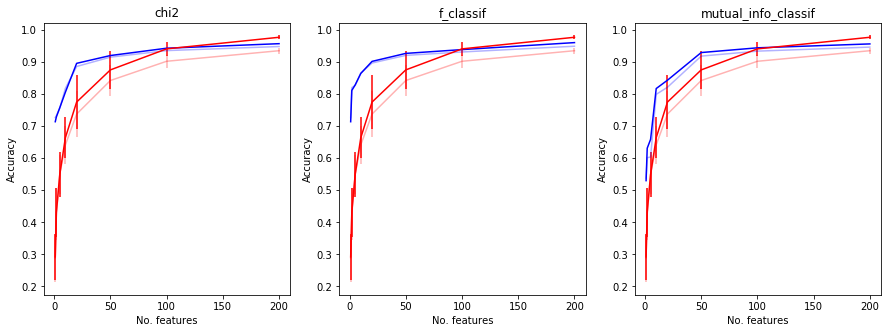

In [11]:
mu_train = np.array([u for u, s in accuracy_train_rand])
s_train = np.array([s for u, s in accuracy_train_rand])
mu_test = np.array([u for u, s in accuracy_test_rand])
s_test = np.array([s for u, s in accuracy_test_rand])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("chi2")
plt.plot(n_features_list, chi2_train_accuracy, '-b')
plt.errorbar(n_features_list, mu_train, yerr=s_train, color='r')
plt.plot(n_features_list, chi2_test_accuracy, '-b', alpha=0.3)
plt.errorbar(n_features_list, mu_test, yerr=s_test, alpha=0.3, color='r')
plt.xlabel("No. features")
plt.ylabel("Accuracy")

plt.subplot(1,3,2)
plt.title("f_classif")
plt.plot(n_features_list, f_classif_train_accuracy, '-b')
plt.errorbar(n_features_list, mu_train, yerr=s_train, color='r')
plt.plot(n_features_list, f_classif_test_accuracy, '-b', alpha=0.3)
plt.errorbar(n_features_list, mu_test, yerr=s_test, alpha=0.3, color='r')
plt.xlabel("No. features")
plt.ylabel("Accuracy")

plt.subplot(1,3,3)
plt.title("mutual_info_classif")
plt.plot(n_features_list, mutual_info_classif_train_accuracy, '-b')
plt.errorbar(n_features_list, mu_train, yerr=s_train, color='r')
plt.plot(n_features_list, mutual_info_classif_test_accuracy, '-b', alpha=0.3)
plt.errorbar(n_features_list, mu_test, yerr=s_test, alpha=0.3, color='r')
plt.xlabel("No. features")
plt.ylabel("Accuracy")

plt.show()

## Wrapper Methods

### Forward Selection

In [12]:
# Load data into numpy arrays
X_train_np = np.loadtxt(path_to_training_data + "/" + x_train_file)
y_train_np = np.loadtxt(path_to_training_data + "/" + y_train_file)

X_test_np = np.loadtxt(path_to_test_data + "/" + x_test_file)
y_test_np = np.loadtxt(path_to_test_data + "/" + y_test_file)

# Load features list
features_df = pd.read_csv(path_to_data + "/" + features_file, sep = " ", index_col=0, header=None) 
features_df.columns = ["names"]

# Convert to pandas data frame
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.Categorical(y_train_np)
X_test_df = pd.DataFrame(X_test_np)
y_test_df = pd.Categorical(y_test_np)

# Label Columns
# X_train_df.columns = list(features_df.names.values)
# X_test_df.columns = list(features_df.names.values)
y_train_df.columns = ["labels"]
y_test_df.columns = ["labels"]


In [13]:
forward_selected_features = []
train_accuracy = []
test_accuracy = []
# feature_list = random.sample(list(X_train_df.columns), 50)
feature_list = list(X_train_df.columns)
while(len(forward_selected_features) < 50):
    feature_with_max_accuracy = None
    max_accuracy = -1
    training_features = forward_selected_features
    for i, feature in enumerate(feature_list):
#         if i%25 == 0:
#             print("Percent Complete: {:.1f}%".format(100*i/len(X_train_df.columns)))    
        training_features.append(feature)
        
       
        selected_X_train_feature = np.array(X_train_df[training_features])
#         clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=())
#         clf.fit(selected_X_train_feature, y_train_np)    
        clf = LinearRegression().fit(selected_X_train_feature, y_train_np)
        accuracy = clf.score(selected_X_train_feature, y_train_np)
        if accuracy > max_accuracy:
            feature_with_max_accuracy = feature
            max_accuracy = accuracy
        training_features.remove(feature)

    forward_selected_features.append(feature_with_max_accuracy)
    feature_list.remove(feature)
    selected_X_train_feature = np.array(X_train_df[forward_selected_features])
    train_accuracy.append(max_accuracy)
    test_accuracy.append(clf.score(selected_X_train_feature, y_train_np))

(0, 1)

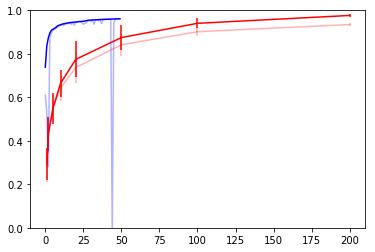

In [14]:
plt.plot(train_accuracy, '-b')
plt.errorbar(n_features_list, mu_train, yerr=s_train, color='r')
plt.plot(test_accuracy, '-b', alpha = 0.3)
plt.errorbar(n_features_list, mu_test, yerr=s_test, color='r', alpha = 0.3)
plt.ylim(0,1)

### Backward Elimination

- Start with all features

- Remove one feature 
- Measure performance
- Replace feature
- Repeat

- Remove the feature which contributes least to the accuracy

In [ ]:
accuracies = []
feature_list = list(X_train_df.columns)
backward_selected_features = feature_list
i = 0
while(i < 20):
    i += 1
    feature_with_min_accuracy = None
    max_accuracy = -1
    training_features = backward_selected_features
    for i, feature in enumerate(feature_list):
        if i%10 == 0:
            print("Percent Complete: {:.1f}%".format(100*i/len(X_train_df.columns)))
        
        training_features.remove(feature)
        selected_X_train_feature = np.array(X_train_df[training_features])
        
        clf = LinearRegression().fit(selected_X_train_feature, y_train_np)
        accuracy = clf.score(selected_X_train_feature, y_train_np)
        
        if accuracy > max_accuracy:
            feature_with_min_accuracy = feature
            max_accuracy = accuracy
            
        training_features.append(feature)
    clear_output()
    backward_selected_features.remove(feature_with_min_accuracy)
    accuracies.append(max_accuracy)

## Embedded Methods
### Tree-based method

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
model = ExtraTreesClassifier()
model.fit(X_train_df,y_train_df)
feat_importances = pd.Series(model.feature_importances_)


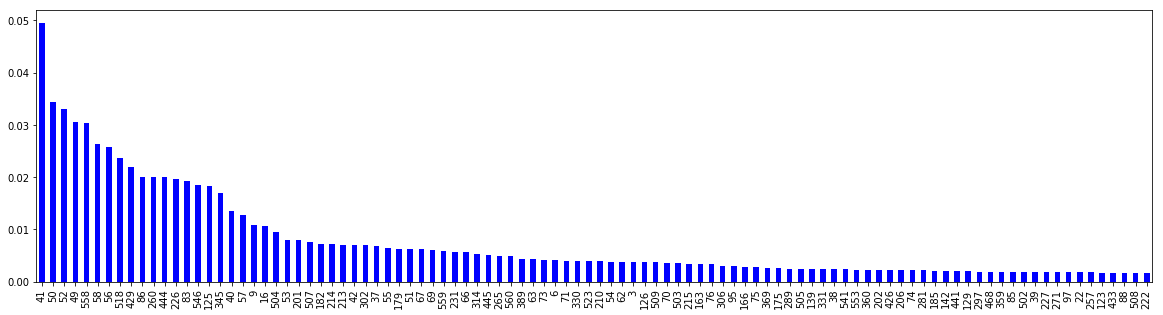

In [17]:
plt.figure(figsize=(20,5))
feat_importances.nlargest(100).sort_values(ascending=False).plot.bar(color="b")

In [18]:
feat_order_of_importance = sorted(list(feat_importances.index.values), key=lambda x: -feat_importances.loc[x])

In [20]:
# Features selected at random, to provide a baseline comparison
train_accuracy = []
test_accuracy  = []
n_features_list = [1,2,5,10,20,50,100,200]
for i in n_features_list:
    
    features = feat_order_of_importance[:i]
    X_train_new = X_train_df[features]
    X_test_new = X_test_df[features]

#     clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_new, y_train_np)
    clf = LinearRegression().fit(X_train_new, y_train_np)
        
    train_accuracy.append(clf.score(X_train_new, y_train_np))
    test_accuracy.append(clf.score(X_test_new, y_test_np))


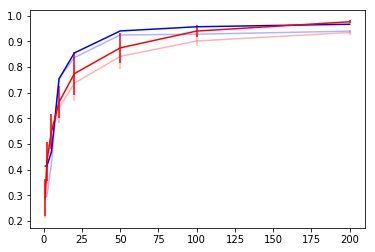

In [23]:
plt.plot(n_features_list, train_accuracy, '-b')
plt.errorbar(n_features_list, mu_train, yerr=s_train, color='r')
plt.plot(n_features_list, test_accuracy, '-b', alpha = 0.3)
plt.errorbar(n_features_list, mu_test, yerr=s_test, color='r', alpha = 0.3)
plt.show()